In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.titlesize'] = 13
mpl.rcParams['axes.labelsize'] = 13
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['font.size'] = 13

In [2]:
data=pd.read_csv("garments_worker_productivity.csv")

In [3]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
data.select_dtypes(include=np.number).columns, data.select_dtypes(include=np.object_).columns

(Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
        'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
        'actual_productivity'],
       dtype='object'),
 Index(['date', 'quarter', 'department', 'day'], dtype='object'))

In [5]:
data["year2"]=data["date"].str.split("/").str[2].astype(np.int64)
data["day2"]=data["date"].str.split("/").str[1].astype(np.int64)
data["month2"]=data["date"].str.split("/").str[0].astype(np.int64)
dict1={"Quarter1":1,"Quarter2":2,"Quarter3":3,"Quarter4":4,"Quarter5":5}
dict2={"Monday":1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}
dict3={'sweing':1, 'finishing ':2, 'finishing':2}
data["quarter2"]=data["quarter"].map(dict1)
data["day3"]=data["day"].map(dict2)
data["department2"]=data["department"].map(dict3)

In [6]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,idle_men,no_of_style_change,no_of_workers,actual_productivity,year2,day2,month2,quarter2,day3,department2
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,0,59.0,0.940725,2015,1,1,1,4,1
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,...,0,0,8.0,0.886500,2015,1,1,1,4,2
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,0,30.5,0.800570,2015,1,1,1,4,1
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,0,30.5,0.800570,2015,1,1,1,4,1
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,0,56.0,0.800382,2015,1,1,1,4,1


In [7]:
data=data.select_dtypes(include=np.number)

In [8]:
# Printing Null values or missing data values
print("Missing data for variable wip is",round(data["wip"].isnull().sum()/len(data)*100,2),"percent!")
pd.DataFrame(data.isnull().sum()).T

Missing data for variable wip is 42.27 percent!


,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year2,day2,month2,quarter2,day3,department2
0,0,0,0,506,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
pd.DataFrame(data.describe()).T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [10]:
data2=data.dropna()
data2

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,year2,day2,month2,quarter2,day3,department2
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2015,1,1,1,4,1
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1,1,4,1
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2015,1,1,1,4,1
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2015,1,1,1,4,1
5,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125,2015,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051,2015,11,3,2,3,1
1188,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557,2015,11,3,2,3,1
1189,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505,2015,11,3,2,3,1
1190,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246,2015,11,3,2,3,1


In [11]:
# Creating a function to get imputation over variables
def impute_nan_meanmedian(df, variable, value, rnd=1):
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    df[variable+"_"+value]=df[variable+"_"+value].round(rnd)
    return df
import random
def rand_float_range(start, end):
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9, rnd=1):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
        df[variable+"_random_fixed"]=df[variable+"_random_fixed"].round(rnd)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
        df[variable+"_random"]=df[variable+"_random"].round(1)
    return df

In [12]:
from sklearn.impute import KNNImputer
datanew = data.select_dtypes(include=np.number)
def imputer_knn(data,neig=5):
    # define imputer
    imputer = KNNImputer(n_neighbors=neig, weights='distance', metric='nan_euclidean',add_indicator=False)
    # fit on the dataset
    imputer.fit(datanew)
    # transform the dataset
    Xtrans = imputer.transform(datanew)
    Xtrans=pd.DataFrame(Xtrans,columns=datanew.columns)
    data["wip_knn_"+str(neig)]=Xtrans["wip"].round()
    return data

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.metrics import mean_squared_error

In [14]:
def make_imputation(data_file):
    # Mean Imputation
    mean_imputer = SimpleImputer(strategy='mean')
    mean_imputed = mean_imputer.fit_transform(np.array(data["wip"]).reshape(-1, 1))
    data["wip_mean"]=np.round(mean_imputed)

    # Median Imputation
    mean_imputer = SimpleImputer(strategy='median')
    mean_imputed = mean_imputer.fit_transform(np.array(data["wip"]).reshape(-1, 1))
    data["wip_median"]=np.round(mean_imputed)

    # Iterative Imputation
    iter_imputer = IterativeImputer(random_state=42)
    datanew = data.select_dtypes(include=np.number)
    Xtrans = iter_imputer.fit_transform(datanew)
    Xtrans=pd.DataFrame(Xtrans,columns=datanew.columns)
    data["wip_iter"]=Xtrans["wip"].round()
    return data

In [15]:
imputer_knn(data,neig=5)
make_imputation(data)

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,year2,day2,month2,quarter2,day3,department2,wip_knn_5,wip_mean,wip_median,wip_iter
0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,2015,1,1,1,4,1,1108.0,1108.0,1108.0,1108.0
1,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,2015,1,1,1,4,2,929.0,1190.0,1039.0,4716.0
2,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,2015,1,1,1,4,1,968.0,968.0,968.0,968.0
3,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,2015,1,1,1,4,1,968.0,968.0,968.0,968.0
4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,2015,1,1,1,4,1,1170.0,1170.0,1170.0,1170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,...,2015,11,3,2,3,2,928.0,1190.0,1039.0,4717.0
1193,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,...,2015,11,3,2,3,2,928.0,1190.0,1039.0,4717.0
1194,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,...,2015,11,3,2,3,2,928.0,1190.0,1039.0,4717.0
1195,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,...,2015,11,3,2,3,2,559.0,1190.0,1039.0,5092.0


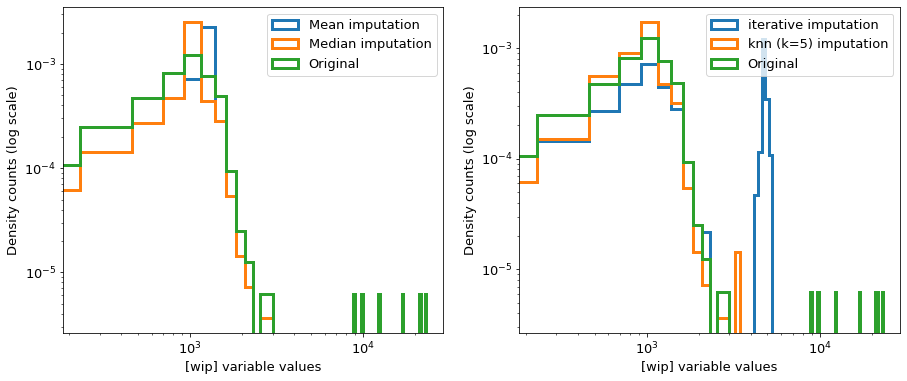

In [16]:
plt.figure(figsize=(15,6))
b=100
plt.subplot(121)
r=[0,data["wip"].max()]
plt.hist(data["wip_mean"],bins=b,density=True,cumulative=False,range=r,label="Mean imputation",histtype="step",lw=3)
plt.hist(data["wip_median"],bins=b,density=True,cumulative=False,range=r,label="Median imputation",histtype="step",lw=3)
plt.hist(data["wip"],bins=b,density=True,cumulative=False,range=r,label="Original",histtype="step",lw=3)
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Density counts (log scale)")
plt.xlabel("[wip] variable values")
plt.subplot(122)
plt.hist(data["wip_iter"],bins=b,density=True,cumulative=False,range=r,label="iterative imputation",histtype="step",lw=3)
plt.hist(data["wip_knn_5"],bins=b,density=True,cumulative=False,range=r,label="knn (k=5) imputation",histtype="step",lw=3)
plt.hist(data["wip"],bins=b,density=True,cumulative=False,range=r,label="Original",histtype="step",lw=3)
plt.legend()
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Density counts (log scale)")
plt.xlabel("[wip] variable values")
plt.show()

In [17]:
data.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity', 'year2', 'day2', 'month2', 'quarter2', 'day3',
       'department2', 'wip_knn_5', 'wip_mean', 'wip_median', 'wip_iter'],
      dtype='object')

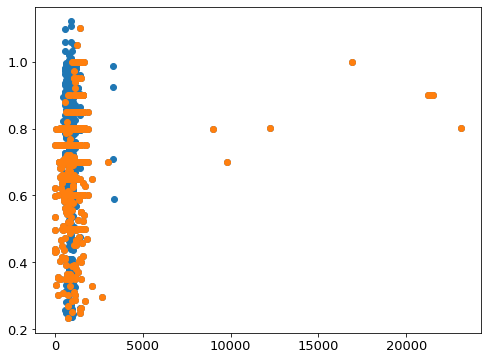

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(data["wip_knn_5"],data["actual_productivity"])
plt.scatter(data["wip"],data["actual_productivity"])
plt.show()

In [19]:
from sklearn.model_selection import train_test_split# Split the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees

In [20]:
def make_RF(ne,rs,var='wip_knn_25',pr=True):
    # Labels are the values we want to predict
    labels = np.array(data['actual_productivity'])# Remove the labels from the features
    # axis 1 refers to the columns
    features=data[['team', 'targeted_productivity', 'smv', var, 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'year2', 'day2', 'month2', 'quarter2', 'day3', 'department2']]#
    # Saving feature names for later use
    feature_list = list(features.columns)
    # Convert to numpy array
    features = np.array(features)
    # Using Skicit-learn to split data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.15, random_state = rs)
    # max_features={"auto", "sqrt", "log2"}
    rf = RandomForestRegressor(n_estimators = ne, random_state = rs,max_features="auto")
    # Train the model on training data
    rf.fit(train_features, train_labels)
    # Use the forest's predict method on the test data
    predictions = rf.predict(features)
    # Calculate the absolute and square errors
    errors = abs(predictions - labels)
    errors2 = (predictions - labels)**2
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / labels)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    # Correlation:
    corrcoef=np.corrcoef(labels,predictions)[0][1]
    # Get numerical feature importances
    importances = list(rf.feature_importances_)
    # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    if pr:
        # Print out the mean absolute error (mae)
        print('Mean Absolute Error (MAE):', round(np.mean(errors), 4))
        # Print out the mean square error (mse)
        print('Mean Square Error (MSE):', round(np.mean(errors2), 4))
        print('Root Mean Square Error (RMSE):', round(np.sqrt(np.mean(errors2)), 4))
        # Print out the mape (mape)
        print('Mean Absolute Percentage Error (MAPE):', round(np.mean(mape), 4))
        print('Accuracy:', round(accuracy, 2), '%.')
        # Print out the feature and importances 
        [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
    return rs,round(accuracy,2),round(corrcoef,4),round(np.mean(errors),4),round(np.sqrt(np.mean(errors2)),4)

In [21]:
#make_RF(1500,312133,'wip_mean',True)

In [22]:
for i in np.random.randint(0,99999999,10):
    print(i,make_RF(500,i,"wip_knn_5",False))

84609126 (84609126, 93.84, 0.9427, 0.0341, 0.0612)
89308313 (89308313, 93.94, 0.9402, 0.0344, 0.0619)
18429194 (18429194, 93.95, 0.9457, 0.0341, 0.0601)
67746334 (67746334, 93.91, 0.9348, 0.0343, 0.0641)
11381630 (11381630, 93.74, 0.933, 0.035, 0.0651)
16815079 (16815079, 93.81, 0.9358, 0.0347, 0.0638)
66772064 (66772064, 93.66, 0.9266, 0.0356, 0.0675)
14632845 (14632845, 93.65, 0.9381, 0.035, 0.0636)
76233311 (76233311, 93.94, 0.9484, 0.0339, 0.0589)
11629716 (11629716, 93.61, 0.9415, 0.0351, 0.0624)


In [23]:
make_RF(500,68861873,'wip_mean',True)

Mean Absolute Error (MAE): 0.0343
Mean Square Error (MSE): 0.0036
Root Mean Square Error (RMSE): 0.0604
Mean Absolute Percentage Error (MAPE): 5.9883
Accuracy: 94.01 %.
Variable: targeted_productivity Importance: 0.23
Variable: smv                  Importance: 0.11
Variable: incentive            Importance: 0.11
Variable: team                 Importance: 0.1
Variable: no_of_workers        Importance: 0.1
Variable: day2                 Importance: 0.1
Variable: over_time            Importance: 0.08
Variable: day3                 Importance: 0.06
Variable: wip_mean             Importance: 0.03
Variable: month2               Importance: 0.02
Variable: quarter2             Importance: 0.02
Variable: idle_men             Importance: 0.01
Variable: department2          Importance: 0.01
Variable: idle_time            Importance: 0.0
Variable: no_of_style_change   Importance: 0.0
Variable: year2                Importance: 0.0


(68861873, 94.01, 0.9439, 0.0343, 0.0604)

In [24]:
make_RF(500,68861873,'wip_knn_5',True)

Mean Absolute Error (MAE): 0.0346
Mean Square Error (MSE): 0.0038
Root Mean Square Error (RMSE): 0.0613
Mean Absolute Percentage Error (MAPE): 6.0142
Accuracy: 93.99 %.
Variable: targeted_productivity Importance: 0.23
Variable: smv                  Importance: 0.11
Variable: wip_knn_5            Importance: 0.11
Variable: incentive            Importance: 0.11
Variable: no_of_workers        Importance: 0.1
Variable: team                 Importance: 0.09
Variable: day2                 Importance: 0.08
Variable: day3                 Importance: 0.06
Variable: over_time            Importance: 0.05
Variable: idle_men             Importance: 0.02
Variable: month2               Importance: 0.02
Variable: quarter2             Importance: 0.02
Variable: idle_time            Importance: 0.01
Variable: department2          Importance: 0.01
Variable: no_of_style_change   Importance: 0.0
Variable: year2                Importance: 0.0


(68861873, 93.99, 0.9416, 0.0346, 0.0613)

In [25]:
make_RF(500,68861873,'wip_iter',True)

Mean Absolute Error (MAE): 0.0349
Mean Square Error (MSE): 0.0038
Root Mean Square Error (RMSE): 0.0615
Mean Absolute Percentage Error (MAPE): 6.0673
Accuracy: 93.93 %.
Variable: targeted_productivity Importance: 0.23
Variable: wip_iter             Importance: 0.16
Variable: incentive            Importance: 0.11
Variable: smv                  Importance: 0.1
Variable: team                 Importance: 0.08
Variable: no_of_workers        Importance: 0.08
Variable: day2                 Importance: 0.08
Variable: day3                 Importance: 0.06
Variable: over_time            Importance: 0.05
Variable: month2               Importance: 0.02
Variable: quarter2             Importance: 0.02
Variable: idle_men             Importance: 0.01
Variable: idle_time            Importance: 0.0
Variable: no_of_style_change   Importance: 0.0
Variable: year2                Importance: 0.0
Variable: department2          Importance: 0.0


(68861873, 93.93, 0.941, 0.0349, 0.0615)